In [15]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm

import statsmodels.tsa.stattools as ts

import yfinance as yf
import seaborn

import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [2]:
symbol_list = ['PEP', 'KO']
data = yf.download(
    symbol_list, 
    start='1985-01-01', 
    end='2020-12-23'
)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [3]:
data

,KO,PEP
Date,,
1985-01-02,0.509263,0.924007
1985-01-03,0.514407,0.929507
1985-01-04,0.513378,0.926757
1985-01-07,0.516465,0.915757
1985-01-08,0.517494,0.904757
...,...,...
2020-12-16,49.205204,135.243576
2020-12-17,49.399948,136.008972
2020-12-18,49.835804,137.147781


Text(0, 0.5, 'Price in $')

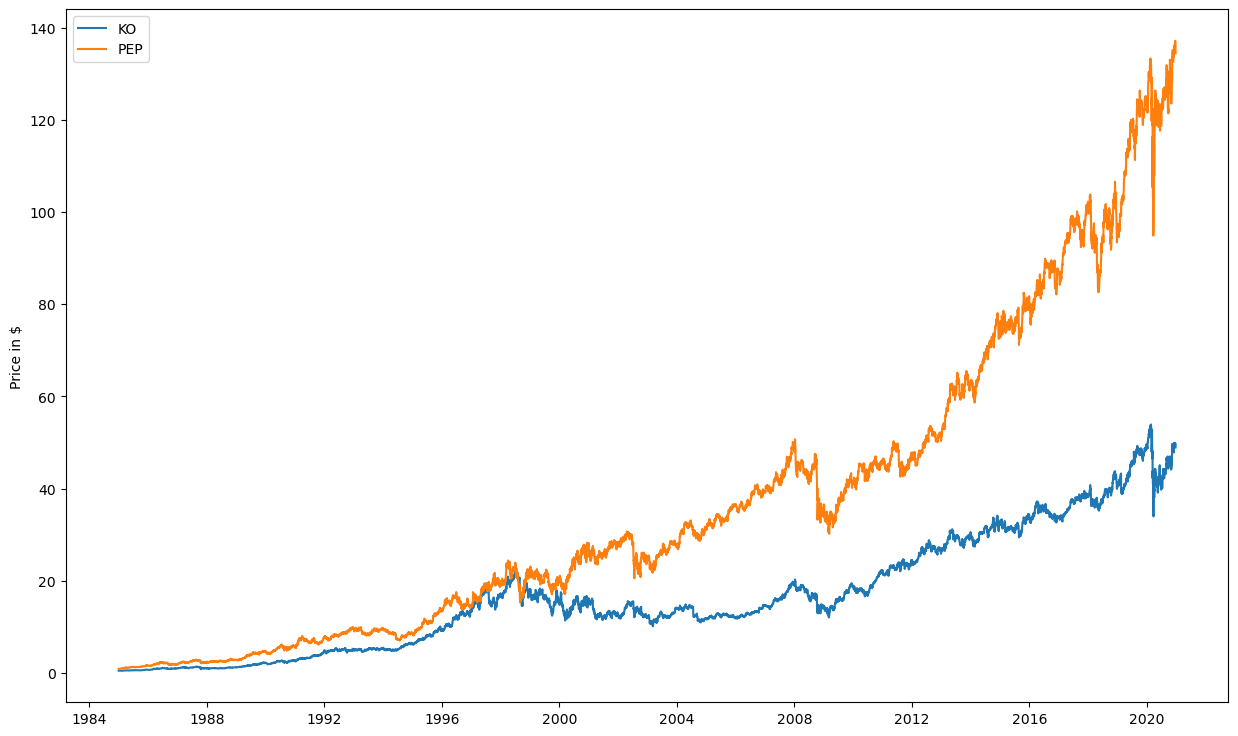

In [20]:
date_index = pd.to_datetime(data.index, format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(date_index, data['KO'], label='KO')
ax.plot(date_index, data['PEP'], label = 'PEP')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

In [5]:
return_df = pd.DataFrame()
return_df['KO'] = (data['KO'] / data['KO'].shift(1)) - 1
return_df['PEP'] = (data['PEP'] / data['PEP'].shift(1)) - 1
return_df

,KO,PEP
Date,,
1985-01-02,NaN,NaN
1985-01-03,0.010099,0.005952
1985-01-04,-0.001999,-0.002959
1985-01-07,0.006013,-0.011870
1985-01-08,0.001992,-0.012012
...,...,...
2020-12-16,-0.014487,0.000829
2020-12-17,0.003958,0.005659
2020-12-18,0.008823,0.008373


Text(0.5, 1.0, 'PEPKO Spread')

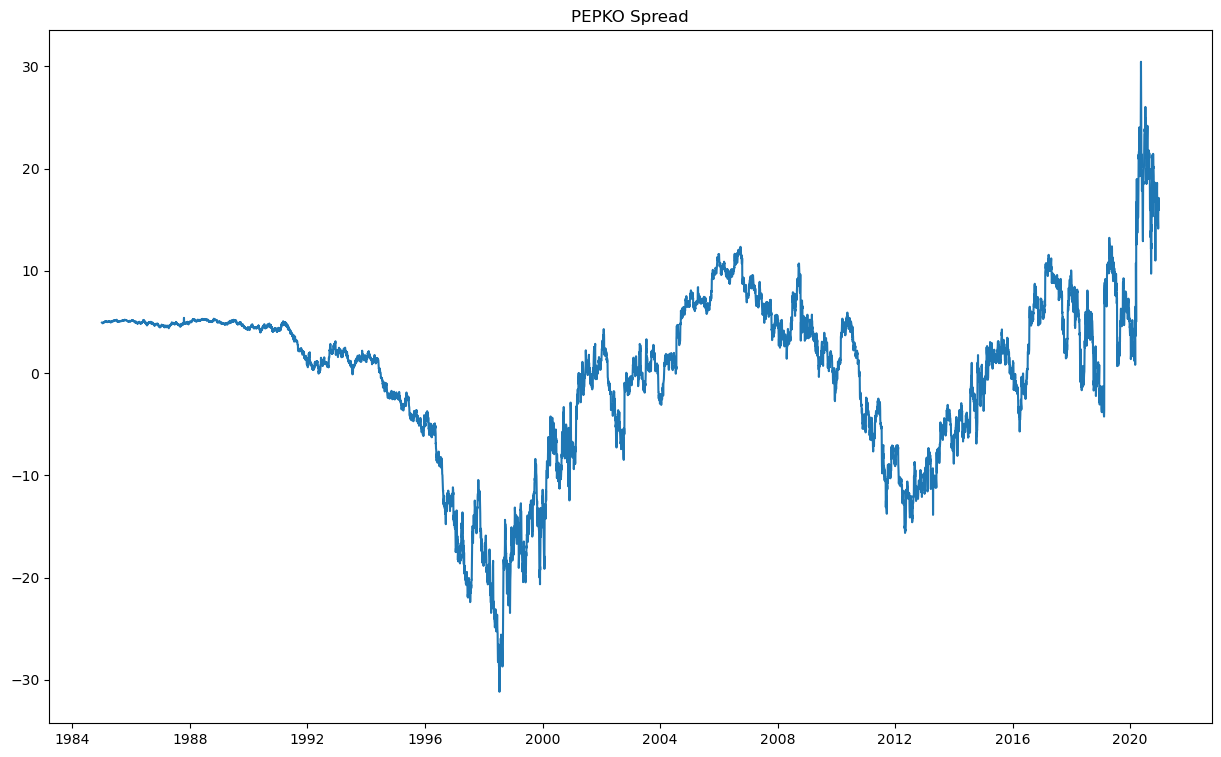

In [27]:
import statsmodels.api as sm;
import statsmodels.tsa.stattools as ts
#(ts.coint(data['PEP'], data['KO']))[1]
result = sm.OLS(data['PEP'],sm.add_constant(data['KO'])).fit()
data['PEPKOspread'] = (data['PEP'] - result.params[1]*data['KO']) -result.params[0]

fig, ax = plt.subplots(figsize=(15,9))
ax.plot(date_index, data['PEPKOspread'].values)
ax.set_title('PEPKO Spread')

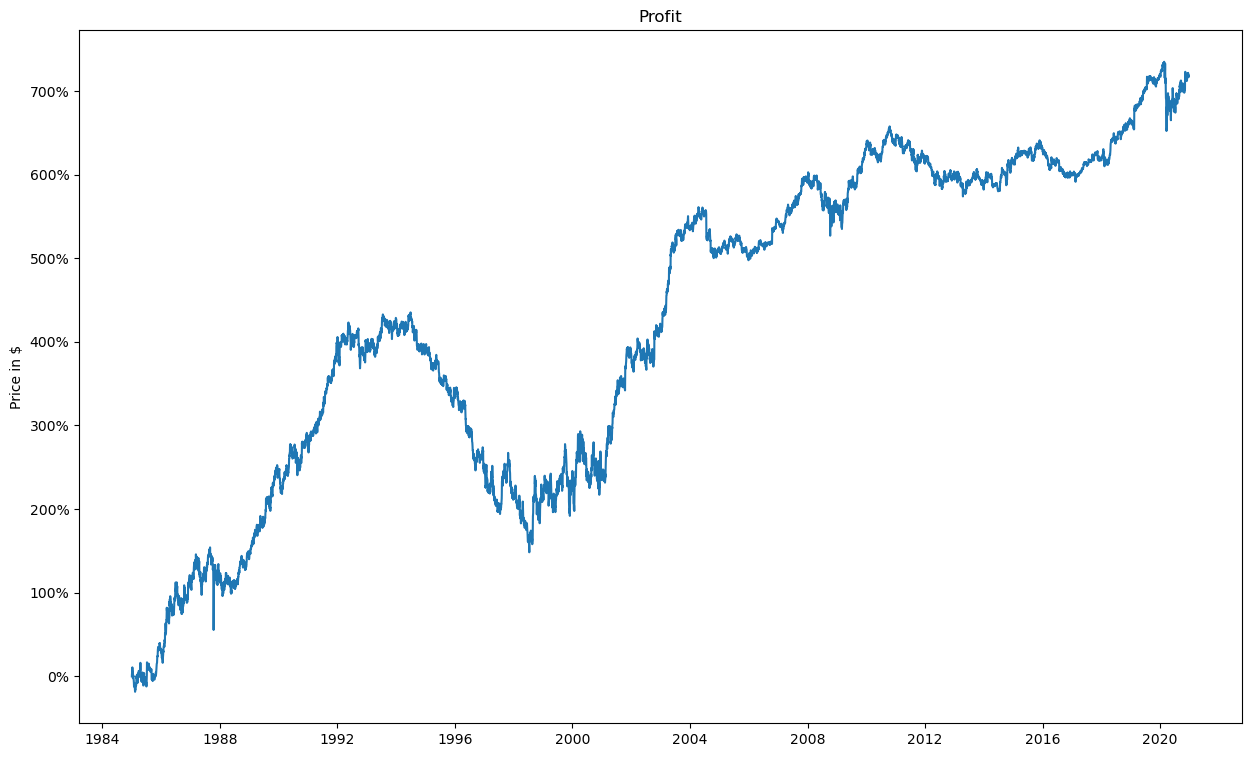

In [28]:
data['PEPKOposition'] = 0
data.loc[data['PEPKOspread']>0, 'PEPKOposition'] = -1
data.loc[data['PEPKOspread']<0, 'PEPKOposition'] = 1
data['PEPKOposition'] = data['PEPKOposition'].shift(1)
data['PEPposition'] = data['PEPKOposition']
data['KOposition'] = data['PEPKOposition']*result.params[1]*-1
data['dailypnl'] = data['KOposition']*return_df['KO'].shift(-1) + data['PEPposition']*return_df['PEP'].shift(-1)
data['cumpnl'] = data['dailypnl'].cumsum()

fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Profit')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
ax.set_ylabel('Price in $')

ax.plot(date_index,data['cumpnl'].values)
plt.show()
